In [27]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [29]:
len(x_train)

60000

In [30]:
x_train[0].shape #every image of 28x28

(28, 28)

In [31]:
x_train[0]
#28 rows with 28 values each

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

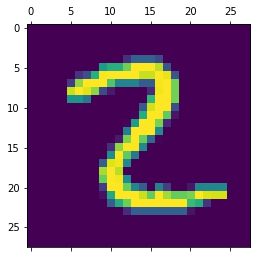

In [32]:
plt.matshow(x_train[76])

In [33]:
y_train[76]

2

In [34]:
#now to flatten the training and testing set
x_train.shape

(60000, 28, 28)

In [35]:
#as we can see above, these are the dimensions of 2d vector. So if we have to convert to 1d,
# shape has to be fed in this format only
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [39]:
#creating a neural network with only input and output layer without any hidden layers
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #input and output layer is shown along with the activation function
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5) #number of times neural network is run

#Dense, signifies each neural network is connected to others in the network


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5838 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.3202 - accuracy: 0.8770
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.7660 - accuracy: 0.8832
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.4335 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.4303 - accuracy: 0.8870


In [40]:
#but if we scale the values, we can improve accuracy, i.e if we divide every value by 255, out job becomes easier
x_train=x_train/255
x_test = x_test/255
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #input and output layer is shown along with the activation function
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4643 - accuracy: 0.8809
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3029 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9259


In [41]:
#as we can see, the accuracy has increased
model.evaluate(x_test_flattened,y_test)
#the accuracy seems pretty good

313/313 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.9252


[0.2660447955131531, 0.9251999855041504]

In [44]:
#lets predict the values with test sample
y_predicted=model.predict(x_test_flattened)

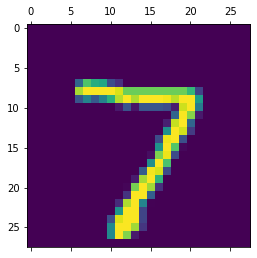

In [46]:
plt.matshow(x_test[0]) 
#we cannot do plt.matshow(x_test_flattened[0]) because it is a 1d arrya and image will notget constructed

In [47]:
y_predicted[0]

array([3.6257863e-02, 4.0644684e-07, 5.4306954e-02, 9.6402359e-01,
       2.1101832e-03, 1.3696501e-01, 1.5894580e-06, 9.9983799e-01,
       1.1547899e-01, 6.5392590e-01], dtype=float32)

In [48]:
import numpy as np
np.max(y_predicted[0])

0.999838

In [51]:
#as the maximum probability corresponds to the 7th index, number is 7
#but better use
np.argmax(y_predicted[0]) #correctly predicted

7

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [54]:
cm=tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm
#we cannot use y_predicted u=in predictions because that would mean that we are comparing 
# probability with actual number results of y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,   10,  922,   16,    9,    6,   11,   10,   41,    4],
       [   2,    0,   17,  916,    0,   32,    2,   12,   23,    6],
       [   2,    1,    6,    1,  923,    0,    8,    4,   10,   27],
       [   7,    3,    3,   31,    9,  787,   11,    6,   29,    6],
       [  11,    3,    9,    1,    8,   20,  901,    2,    3,    0],
       [   1,    6,   21,    6,   10,    0,    0,  954,    4,   26],
       [   5,    9,    7,   18,    9,   31,    8,   12,  869,    6],
       [  11,    7,    1,   10,   31,    7,    0,   30,    6,  906]])>

Text(69.0, 0.5, 'Truth')

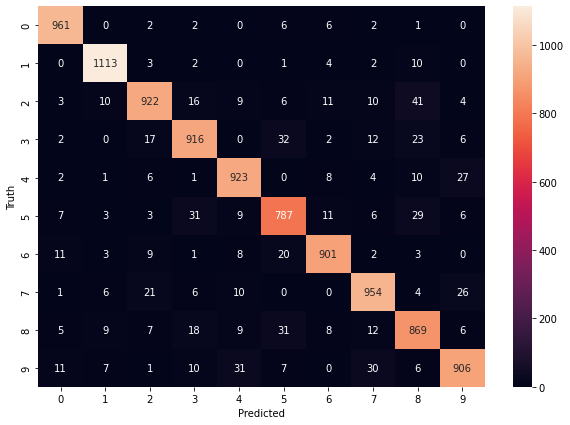

In [55]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# 961 out of total predictions was correct for 0 and so on

In [57]:

#creating a model with hidden layer

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), 
    #Since output is written first, the output of input layer goes into the hidden layer. So we specify a random number of hidden layer
    keras.layers.Dense(10,activation='sigmoid') #no need to write input layers, as network already knows
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)
model.evaluate(x_test_flattened,y_test)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0855 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9797
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0781 - accuracy: 0.9752


[0.07812219113111496, 0.9751999974250793]

Text(69.0, 0.5, 'Truth')

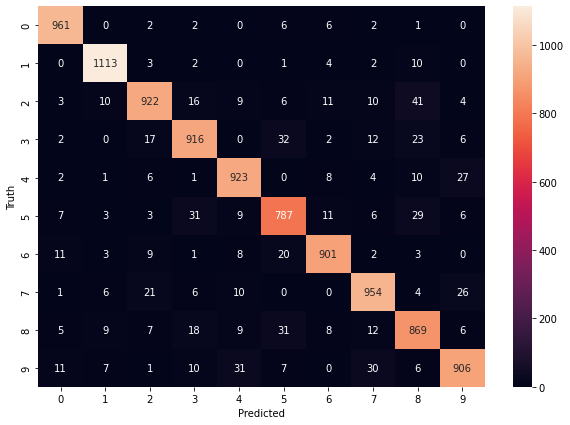

In [58]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
